<a href="https://colab.research.google.com/github/akarshroot/Stock-Predictor/blob/main/Project_StockPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Predictor**
**Date of initiation**: 16/06/2021 <br>
**Goal**: To achieve max accuracy in prediction of close price on being provided with the open price of a particular stock from NIFTY-50 Index. <br>
**Test Data**: https://docs.google.com/spreadsheets/d/1k8nI2wDZjTIqTCWVUpFca_Us5pE3wvw41b79whMpEV0/edit?usp=sharing


In [ ]:
# Library Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from sklearn.linear_model import LinearRegression


## Load Dataset:
### (Stock) CIPLA:

In [ ]:
url = "https://github.com/akarshroot/Stock-Predictor/raw/main/CIPLA.csv"
# urlYahoo = "https://query1.finance.yahoo.com/v7/finance/download/CIPLA.NS?period1=1592301405&period2=1623837405&interval=1d&events=history&includeAdjustedClose=true"
!wget https://github.com/akarshroot/Stock-Predictor/raw/main/CIPLA.csv
ciplaData = pd.read_csv('CIPLA.csv')
# data2 = pd.read_csv(urlYahoo)

--2021-06-20 04:36:45--  https://github.com/akarshroot/Stock-Predictor/raw/main/CIPLA.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/akarshroot/Stock-Predictor/main/CIPLA.csv [following]
--2021-06-20 04:36:46--  https://raw.githubusercontent.com/akarshroot/Stock-Predictor/main/CIPLA.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 596401 (582K) [text/plain]
Saving to: ‘CIPLA.csv’

CIPLA.csv           100%[===================>] 582.42K  --.-KB/s    in 0.01s   

2021-06-20 04:36:46 (43.9 MB/s) - ‘CIPLA.csv’ saved [596401/596401]



### News Sentiment Analysis Dataset:
Load kaggle.json in session storage first and move it to `~/.kaggle/` before downloading dataset.

In [ ]:
# !kaggle datasets download ankurzing/sentiment-analysis-for-financial-news
# np.array(pd.read_csv("all-data.csv", encoding="latin-1"))

## Visualising Data:

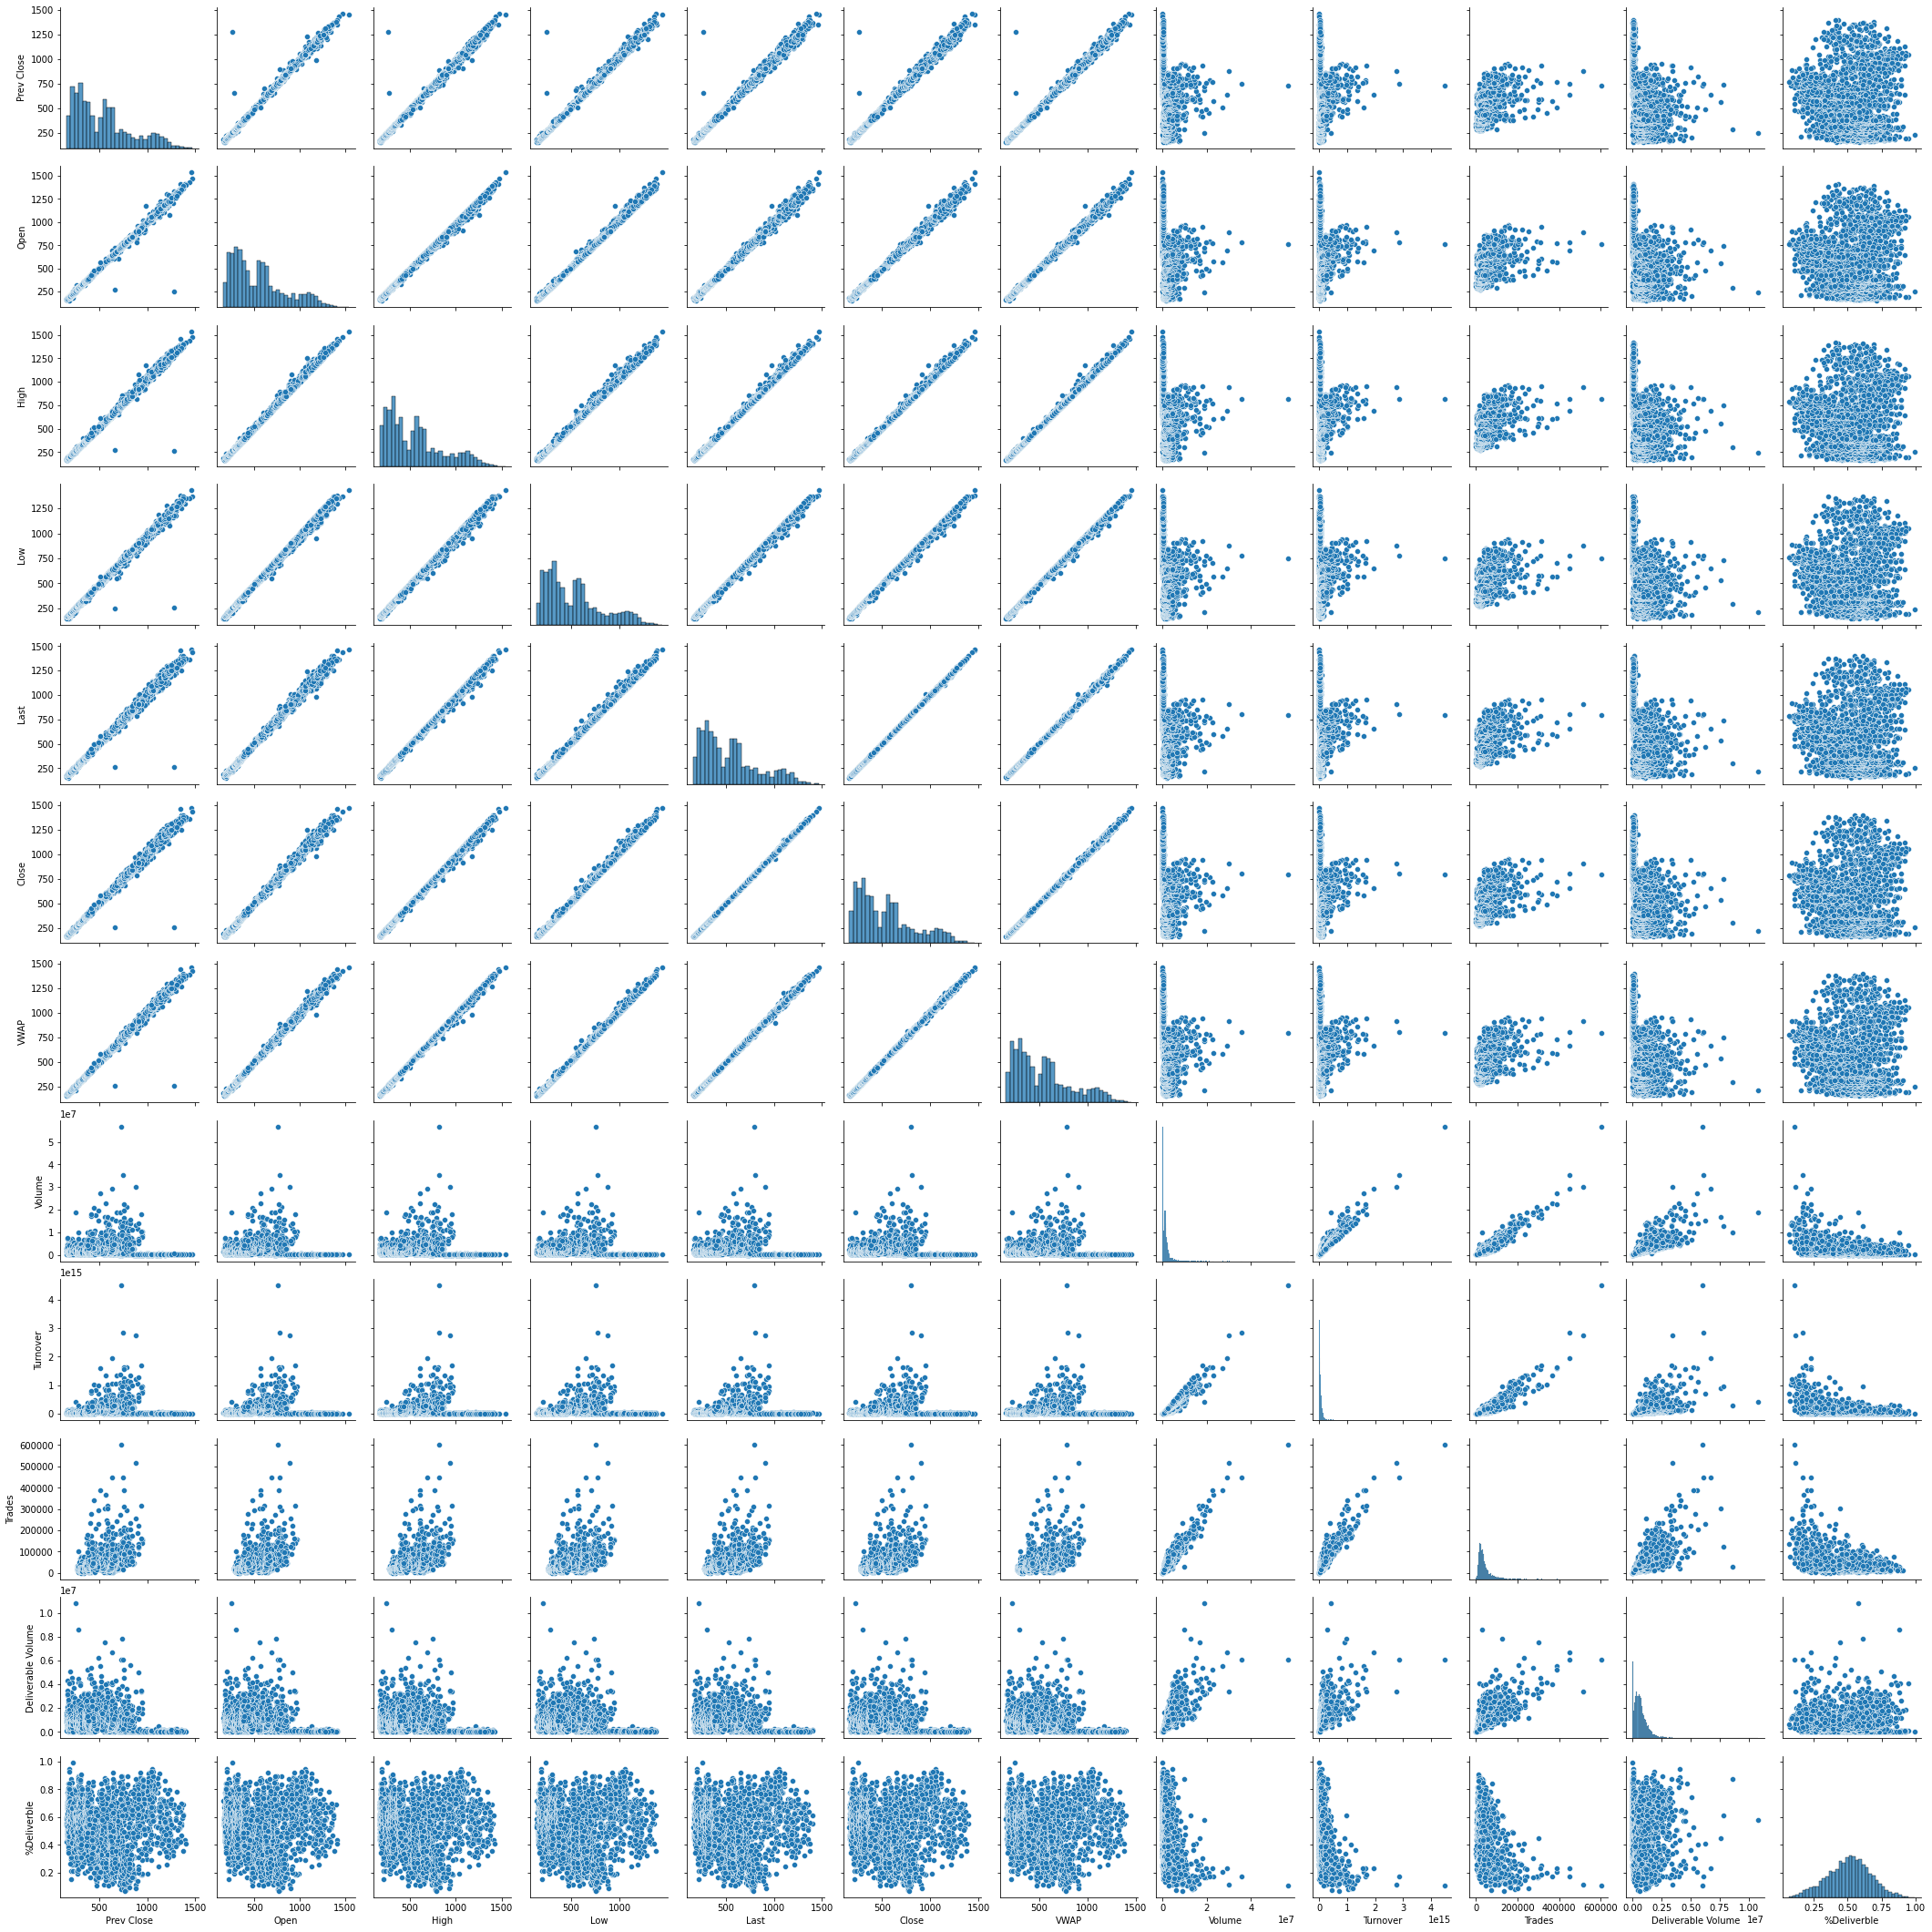

In [ ]:
# ciplaData.head()
# sns.pairplot(ciplaData)
sns.pairplot(ciplaData)
plt.show()

In [ ]:
Open = []
Close = []
with open('CIPLA.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        Open.append((row[4]))
        Close.append((row[8]))

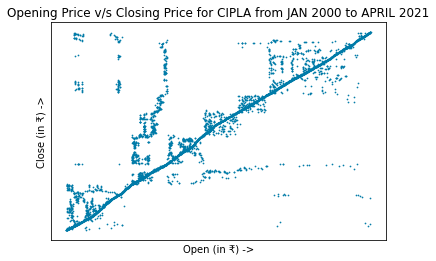

In [ ]:
plt.scatter(Open, Close, color = '#007BA8',s=0.5)
plt.title("Opening Price v/s Closing Price for CIPLA from JAN 2000 to APRIL 2021",fontsize = 12)
plt.xlabel("Open (in ₹) ->")
plt.ylabel("Close (in ₹) ->")
plt.xticks(ticks = [])
plt.yticks(ticks = [])
plt.show()

#### Clearly, Open (x) and Close (y) form a strong linear relationship. 
## Heatmaping:

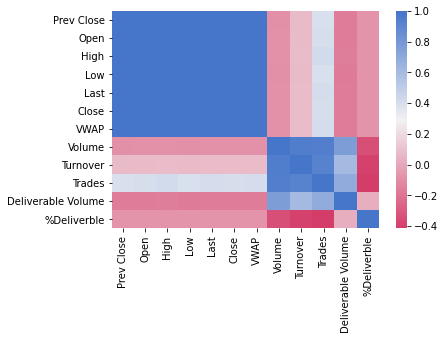

In [ ]:
cmap = sns.diverging_palette(0, 255, as_cmap=True)
sns.heatmap(ciplaData.corr(), cmap=cmap)
plt.show()

In [ ]:
X = np.array(ciplaData["Open"]).reshape((-1,1))
y = ciplaData["Close"]

model = LinearRegression()
model.fit(X, y)

r_sq = model.score(X, y)
print(r_sq)

0.997571806435035


In [ ]:
# pred_y = model.predict([[963.80]])
# print(pred_y)

## **RUN:**
##### Run the below cell

In [ ]:
x = float(input("Enter today's open: "))
print("Today's predicted close:", model.predict([[x]]))

Enter today's open: 950.95
Today's predicted close: [948.28062209]
